# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 17 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

Отправлять дз не нужно, нужно закоммитить в github. Сдается дз лично преподавателю на рубежном контроле (17 марта)

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
#import scipy
#from functools32 import lru_cache
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

from line_profiler import LineProfiler

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Cчитываем данные, полученные в результате выполнения домашнего задания из курса введения, в `data frame` библиотеки `pandas`. Достаем координаты и конвертируем в массив `numpy`. Возможно, в собранном вами файле кодировка будет иной.

In [41]:
data = pd.read_pickle('hw1_rogachev.pkl')
data.head()

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,435,1,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.487519e+09
0,Дачная 2а,14,123,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.483478e+09
0,Лени Голикова 29,8,2,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
0,Героев Танкограда 63,8,158,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
0,Мусы Джалиля 14К1,36,99,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.485073e+09


In [3]:
data.describe()

,checkins,city,country,created,latitude,longitude,pid,type,updated
count,4999.000000,4.999000e+03,4999.0,4.999000e+03,4999.000000,4999.000000,4999.000000,4999.000000,4.593000e+03
mean,16.638728,1.095828e+03,1.0,1.280742e+09,56.068935,41.848142,2500.000000,3.259252,1.417809e+09
std,61.838178,3.210196e+04,0.0,5.130908e+01,3.986579,14.243481,1443.231328,0.438268,5.705482e+07
min,0.000000,1.000000e+00,1.0,1.280742e+09,28.378570,1.694097,1.000000,3.000000,1.280897e+09
25%,1.000000,1.000000e+00,1.0,1.280742e+09,55.640528,30.451619,1250.500000,3.000000,1.355684e+09
50%,3.000000,2.000000e+00,1.0,1.280742e+09,55.778542,37.624494,2500.000000,3.000000,1.425374e+09
75%,11.000000,9.500000e+01,1.0,1.280742e+09,59.858188,43.925272,3749.500000,4.000000,1.474565e+09
max,2299.000000,1.015381e+06,1.0,1.280742e+09,69.066435,131.922657,4999.000000,4.000000,1.488145e+09


In [42]:
x = data[['latitude', 'longitude']].values
print x

[[ 55.657941  37.751574]
 [ 53.202017  50.141377]
 [ 59.843376  30.23148 ]
 ..., 
 [ 59.974518  30.303382]
 [ 55.76363   37.597046]
 [ 56.002732  37.209755]]


In [5]:
mini_set = x[:15]

In [6]:
x_norm = (x-x.mean())/x.std()

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1 Баранчиков Максим	
2 Бекбулатов Рамзан	
3 Белозёров Михаил	
4 Бобылев Владислав	
5 Брызгалов Антон	
6 Будюк Алексей	
7 Валиуллин Альберт	
8 Валиуллин Артур	
9 Васильев Евгений	
10 Галицкий Игорь	
11 Горшков Сергей	
12 Гусев Вячеслав	
13 Дегтярев Роман	
14 Дементьев Максим	
15 Елохов Артур	
16 Ефимов Владислав	
17 Зайцев Александр	
18 Ильин Иван	
19 Имеев Мерген	
20 Камалбеков Тимур	
21 Капитонов Александр	
22 Каспарьянц Георгий	
23 Кафанов Олег	
24 Клейменов Андрей	
25 Козлов Иван	
26 Колмакова Татьяна	
27 Комов Евгений	
28 Крылов Иван	
29 Кузьмина Ирина	
30 Куклева Анна	
31 Курьянов Илья	
32 Лобанов Алексей	
33 Лозинский Иван	
34 Лузин Игорь	
35 Лукьянчиков Иван	
36 Неред Максим	
37 Новикова Анастасия	
38 Новичков Сергей	
39 Омаров Темирхан	
40 Павлова Анастасия	
41 Петренко Иван	
42 Пилюгин Вадим	
43 Плошкин Александр	
44 Полякова Вера	
45 Попкова Екатерина	
46 Преображенский Анатолий	
47 Пронин Сергей	
48 Пучкин Данила	
49 Рогачев Александр	
50 Руденко Дмитрий	
51 Рыбаков Владислав	
52 Санников Артём	
53 Скиба Глеб	
54 Страдомский Сергей	
55 Тескер Константин	
56 Трифанов Петр	
57 Хапкин Артем	
58 Хорошенький Илья	
59 Чокля Дмитрий	
60 Шмурак Денис	
61 Щербакова Елена	

In [8]:
N = 49# put your index here

In [9]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)", 
    u"OPTICS. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [14]:
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implementation of hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage 
    (параметры - k, linkage)
    """
    
    def __init__(self, **kwargs):
        """
        Инициализация метода
        :k - количество кластеров (по умолчанию 3 кластерa)
        :linkage - выбор метрики между кластерами
        поддерживается выбор single, complete, average (по умолчанию single)
        """
        self.k = kwargs.get('k',3)
        self.linkage = kwargs.get('linkage','single')
        return
    
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.x_len = len(x)  #иниц-ровали кол-во кластеров - переменная имеет смысл текущего количества кластеров
        self.labels = np.linspace(0, self.x_len - 1, num = self.x_len, dtype = int) #сказали, что каждый объект это уник. кластер
        valid_labels = np.linspace(0, self.x_len - 1, num = self.x_len, dtype = int) #O(n) дополнительной памяти
        if self.linkage == 'single':  #выбрали нужную метрику. по умолчанию должен быть сингл линкэйдж
            metric = self._single
            print 'single-linkage'
        if self.linkage == 'average':
            metric = self._average 
            print 'average-linkage'
        if self.linkage == 'complete':
            metric = self._complete  
            print 'complete-linkage'
        
        #pair_dist = np.zeros((self.x_len, self.x_len))
        #вообще круто будет всё считать из матрицы попарных 
        #расстояний, но для быстроты её нужно делать не матрицей, а какой-нибудь упорядоченной кучей или деревом
        #в боевых алгоритмах реализовано через heap, я был прав
        while self.x_len > self.k:
            iter = 0
            C_a = -1
            C_b = -2
            min_dist = float('inf')  #distance between closest
            for i in valid_labels[:]:
                a = x[(self.labels == i)]
                iter = iter + 1
                if iter % 1000 == 0:
                    print i,
                
                for j in valid_labels[iter:]:#xrange(i+1, self.x_len):
                    b = x[(self.labels == j)]
                    dist = metric(a, b) # metric dist. betw. clusters
                    if dist < min_dist:
                        min_dist = dist
                        C_a = i     #запомнили номера кластеров, у которых минимальное расстояние
                        C_b = j
            mask_merge = (self.labels == C_b)
            #print 'merging',C_a,' ',C_b,'clusters'
            self.labels[mask_merge] = C_a     #слили два наиболее близких кластера
            valid_labels = valid_labels[valid_labels!=C_b]
            self.x_len = self.x_len - 1 
        return self
    
    def predict(self, x):
        """
        Формально процедура кластеризации не подразумевает метода predict, но что поделать:
        будем проходить по всем кластерам, полученным из fit и выбирать наиболее подходящий по метрике.
        Или не будем, что я тут развожу котовасию.
        """
#        min_dist = float('inf') # distance between closest
#        for i in xrange(0 ,len(self.x_len)):
#            for j in xrange(i+1, self.x_len):
#                mask_i = (self.labels == i)
#                mask_j = (self.labels == j)
#                a = x[mask_i]
#                b = x[mask_j]
#                dist = metric(a, b) # metric dist. betw. clusters
#                if dist < min_dist:
#                    min_dist = dist
#                    C_a = i     #запомнили номера кластеров, у которых минимальное расстояние
#                    C_b = j
        return self.labels

    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)
    
    #@lru_cache(maxsize=None)   
    def _single(self, a, b):
        if len(a.shape) != 1:
            len_a = len(a)
        else:
            len_a = 1
        if len(b.shape) != 1:
            len_b = len(b)
        else:
            len_b = 1
        min_dist = float('inf')
        for i in xrange(0, len_a):
            for j in xrange(0, len_b):
                dist = np.linalg.norm(a[i]-b[j])
                if dist < min_dist:
                    min_dist = dist
        return min_dist
    
    #@lru_cache(maxsize=None)  
    def _complete(self, a, b):
        if len(a.shape) != 1:
            len_a = len(a)
        else:
            len_a = 1
        if len(b.shape) != 1:
            len_b = len(b)
        else:
            len_b = 1
        max_dist = 0
        for i in xrange(0, len_a):
            for j in xrange(0, len_b):
                dist = np.linalg.norm(a[i]-b[j])
                if dist > max_dist:
                    max_dist = dist
        return max_dist
    
    #@lru_cache(maxsize=None)
    def _average(self, a, b):
        if len(a.shape) != 1:
            len_a = len(a)
        else:
            len_a = 1
        if len(b.shape) != 1:
            len_b = len(b)
        else:
            len_b = 1
        average_dist = 0
        for i in xrange(0, len_a):
            for j in xrange(0, len_b):
                average_dist = average_dist + np.linalg.norm(a[i]-b[j]) # summ of dist. betw. dots
        return average_dist/(len_a*len_b)

## Пересчет расстояний после объединения кластеров

* Single linkage
$$ d_{min}(C_i, C_j) = \min_{\mathbf{x} \in C_i, \mathbf{x}' \in C_j} \|\mathbf{x} -\mathbf{x}' \| $$

* Complete linkage
$$ d_{max}(C_i, C_j) = \max_{\mathbf{x} \in C_i, \mathbf{x}' \in C_j} \|\mathbf{x} -\mathbf{x}' \| $$

* Average linkage
$$ d_{avg}(C_i, C_j) = \frac{1}{n_i n_j}\sum_{\mathbf{x} \in C_i}\sum_{\mathbf{x}' \in C_j} \|\mathbf{x} -\mathbf{x}' \| $$

* Centroid linkage
$$ d_{cent}(C_i, C_j) = \|\mu_i -\mu_j \| $$

* Ward linkage
$$ d_{ward}(C_i, C_j) = \sqrt{\frac{n_i n_j}{n_i + n_j}} \|\mu_i - \mu_j \|$$


Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

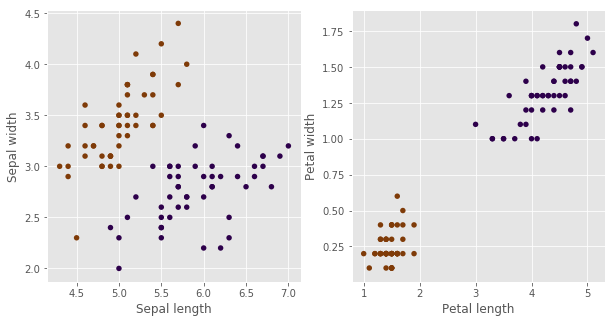

In [16]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [17]:
pred_iris = Clustering(k=2, linkage = 'average').fit(x_iris) #fit_predict
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris.labels)

average-linkage
Adjusted Rand index for iris is: 1.00


Без серьёзного ускорения упорядоченной кучей работает алгоритм медленно. Посмотрим на старшего брата из sklearn и проверим его на качество (или проверим себя)

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
delimiter = 100
m = 3
link = 'average'
y_std = AgglomerativeClustering(n_clusters=m, linkage=link).fit_predict(x[:delimiter])
y_pred = Clustering(k=m, linkage = link).fit_predict(x[:delimiter])
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_std, y_pred)

average-linkage
Adjusted Rand index for iris is: 1.00


Ура, на настоящих данных алгоритмы работают одинаково

Оценим скорость работы алгоритма: размечают они одинаково

In [147]:
%%timeit
pred_iris = Clustering(k=2, linkage = 'average').fit(x[:300]) #fit_predict
#print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris.labels)

average-linkage
average-linkage
average-linkage
average-linkage
1 loop, best of 3: 2min 34s per loop


In [24]:
%%timeit
AgglomerativeClustering(n_clusters=2, linkage='average').fit_predict(x[:300])

100 loops, best of 3: 2.77 ms per loop


Ну это шляпа. Буду использовать его, иначе вообще никогда не посчитаю

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [26]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

def quality2(X, y):
    """
    Silhouette quality criterion
    """
    le = LabelEncoder()
    le.fit(y)
    y = le.fit_transform(y)
    cnt = Counter(y)
    n_clusters = len(le.classes_)
    sil_samples = np.zeros(len(X))   #силуэты для каждой точки
    inner_dist = np.zeros(len(X))   #ср. расстояния от каждой точки до своего кластера
    outer_dist_all =  np.full((n_clusters, len(X)), np.inf)   #ср. расстояния от каждой точки до всех остальных кластеров
    outer_dist_sample = np.zeros(len(X))   #min расст. от каждой точки до другого кластера
    distance_matrix = distance_metrics()[metric](X, X)   #матрица расстояний между всеми точками
    for cl in xrange(n_clusters):
        mask = (y == cl)
        inner_dist[mask] = np.sum(distance_matrix[mask][:,mask], axis=1)
        inner_dist[mask] /= cnt[cl]-1  #ср. расстояния от каждой точки до своего кластера
              
        for cl_out in xrange(n_clusters):
            if cl_out != cl:
                outer_dist_all[cl_out][mask] = np.mean(distance_matrix[mask][:,y == cl_out], axis=1)
                outer_dist_sample[mask] = outer_dist_all[:,mask].min(axis=0)  #ср. расстояния от каждой точки до ближайшего соседнего кластера
                
    inner_dist[np.argwhere(np.isnan(inner_dist))] = 0
    sil_samples = (outer_dist_sample - inner_dist)/np.maximum(outer_dist_sample, inner_dist)
    return np.average(sil_samples)

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

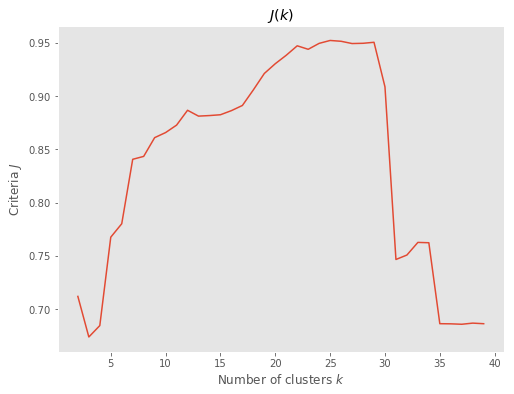

In [28]:
from sklearn.metrics import silhouette_score, silhouette_samples

ks = range(2, 40)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    #cls = Clustering(n_clusters=k)
    cls = AgglomerativeClustering(n_clusters=k)
    y = cls.fit_predict(x)
    criteria[i] = quality2(x, y)
    #print k
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Не отходя от кассы выберем наилучший linkage:

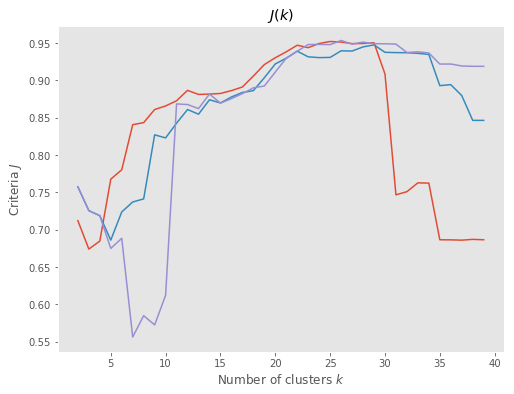

In [34]:
ks = range(2, 40)
criteria = np.zeros((3,len(ks)))

for i, k in enumerate(ks):
    for j, link in enumerate(['ward', 'complete', 'average']):
        #cls = Clustering(n_clusters=k)
        cls = AgglomerativeClustering(n_clusters=k, linkage=link)
        y = cls.fit_predict(x)
        criteria[j,i] = silhouette_score(x, y)
        #criteria[j, i] = quality2(x, y)
    #print k
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria[0])
pl.plot(ks, criteria[1])
pl.plot(ks, criteria[2])
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Вроде всё работает одинаково хорошо, очень жалко, что забыл подписать цвета. На полном наборе ирисов (150 значений) лучше всего работал average-linkage. Кроме того, прочитал в одной из статей про Aggromerative Hierarhical Clustering, что лучше всего работает свё, кроме single-linkage.

In [45]:
k = 25
cls = AgglomerativeClustering(n_clusters=k, linkage='average')
y = cls.fit_predict(x)

Далее необходимо кластеризовать данные, используя выбранное количество кластеров, и визуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время. 

Визуализируем кластеризацию на карте

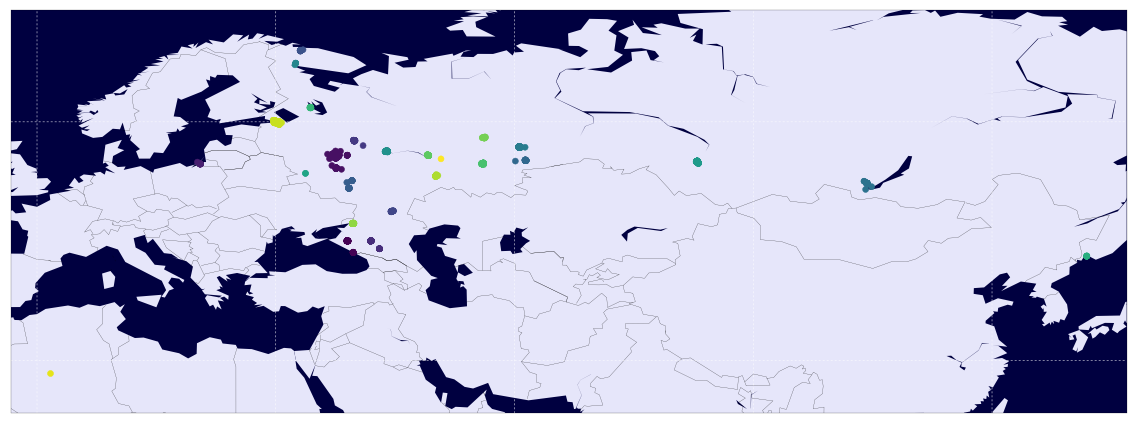

In [46]:
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=min(x[:, 0]) - 5, urcrnrlat=max(x[:, 0]) + 5, llcrnrlon=min(x[:, 1]) - 5, urcrnrlon=max(x[:, 1]) + 5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(x[:, 1], x[:,0], c=y, zorder=10)
    
pl.show()

Визуализируйте интересные участки (может быть это Москва) в приближенном виде. Постройте 3 (или более, в зависимости от данных, что вам самим бы хотелось увидеть ближе) увеличенных изображений карты с кластеризацией.

Посмотрим на Кубань и Чёрное море

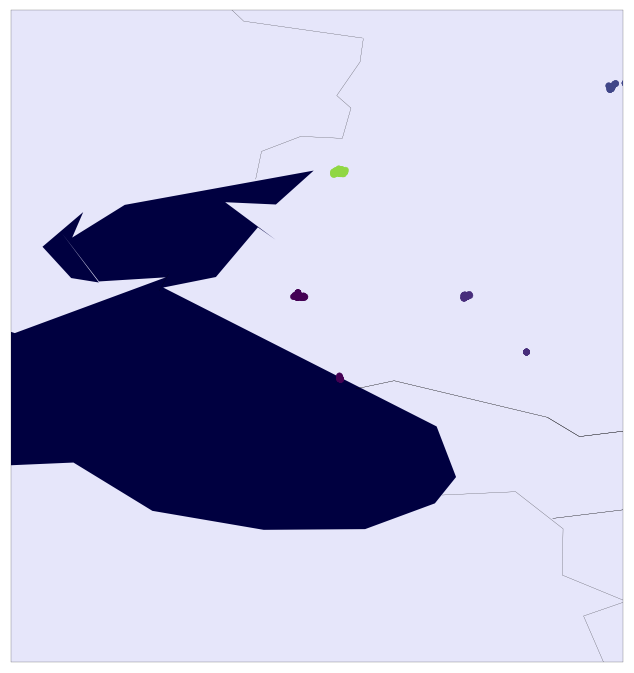

In [47]:
pl.figure(figsize=(20,12))

cluster = 0
x_cl = x[y == cluster]

m = bm.Basemap(projection='cyl', llcrnrlat=min(x_cl[:, 0]) - 5, urcrnrlat=max(x_cl[:, 0]) + 5, llcrnrlon=min(x_cl[:, 1]) - 5, urcrnrlon=max(x_cl[:, 1]) + 5, resolution='c')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)

m.scatter(x[:, 1], x[:,0], c = y, zorder=10)
    
pl.show()

Отлично видно Ростов-на-Дону, Ставрополь, Сочи. Шэйпфайлы для этой части России не стал качать, только для Москвы.

Москва и МО издалека:

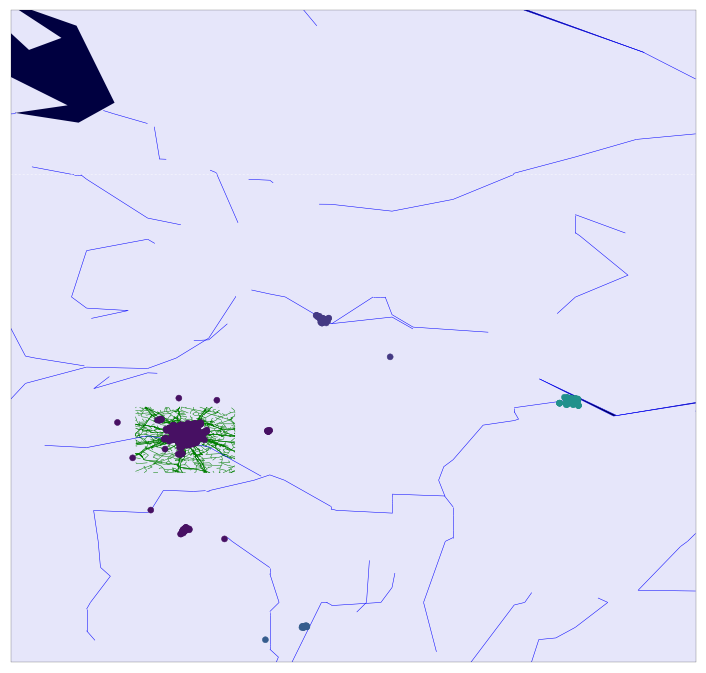

In [65]:
pl.figure(figsize=(20,12))

cluster = 4
x_cl = x[y == cluster]

m = bm.Basemap(projection='cyl', llcrnrlat=min(x_cl[:, 0]) - 5, urcrnrlat=max(x_cl[:, 0]) + 5, llcrnrlon=min(x_cl[:, 1]) - 5, urcrnrlon=max(x_cl[:, 1]) + 5, resolution='c')
m.readshapefile('moscow_russia.imposm-shapefiles/moscow_russia_osm_roads_gen1', 'areas', color='green')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawrivers(color='#0000ff')

m.scatter(x[:, 1], x[:,0], c = y, zorder=10)
    
pl.show()

Кроме Москвы видно областные центры навроде Тулы, Нижнего Новгорода, Рязани

Для кластеризации в Москве нужно подобрать количество кластеров (выборка ведь изменилась):

In [49]:
x_msk = x[y == 1]


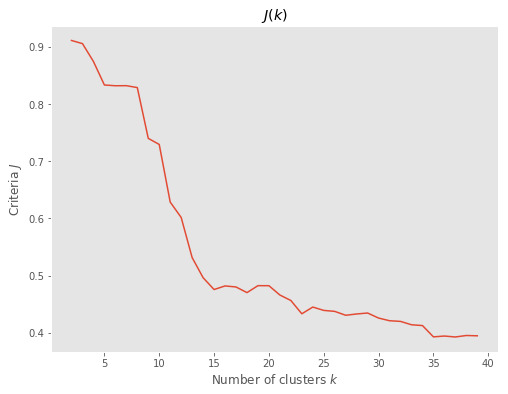

In [50]:
from sklearn.metrics import silhouette_score, silhouette_samples

ks = range(2, 40)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    #cls = Clustering(n_clusters=k)
    cls = AgglomerativeClustering(n_clusters=k, linkage='average')
    y_msk = cls.fit_predict(x_msk)
    criteria[i] = silhouette_score(x_msk, y_msk)
    #criteria[i] = quality(x_msk, y_msk)
    #print k
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

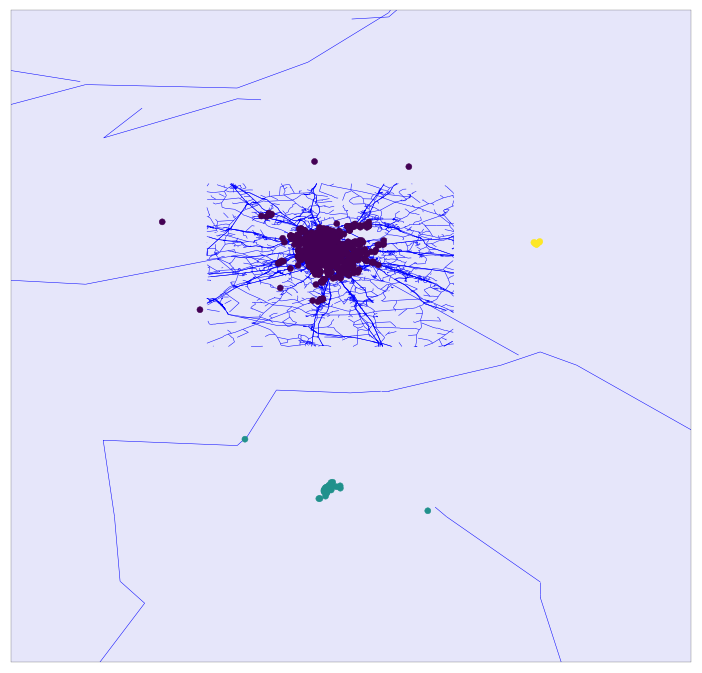

In [63]:
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=min(x_msk[:, 0]) - 1, urcrnrlat=max(x_msk[:, 0]) + 1, llcrnrlon=min(x_msk[:, 1]) - 1, urcrnrlon=max(x_msk[:, 1]) + 1, resolution='c')

y_msk = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(x_msk)
m.readshapefile('moscow_russia.imposm-shapefiles/moscow_russia_osm_roads_gen1', 'areas', color='blue')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawrivers(color='#0000ff')

m.scatter(x_msk[:, 1], x_msk[:,0], c=y_msk, zorder=10)
    
pl.show()

Видим три подкластера: Москву, Тулу и Орехово-Зуево

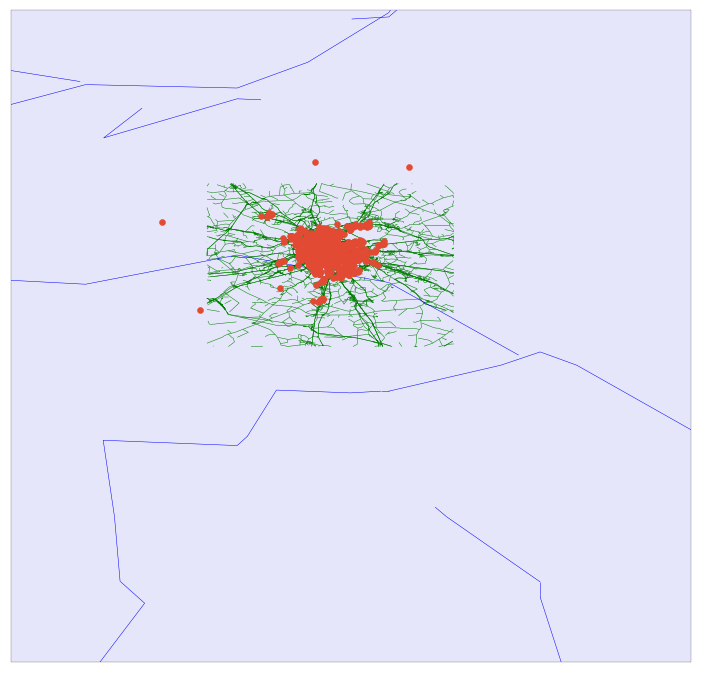

In [61]:
pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=min(x_msk[:, 0]) - 1, urcrnrlat=max(x_msk[:, 0]) + 1, llcrnrlon=min(x_msk[:, 1]) - 1, urcrnrlon=max(x_msk[:, 1]) + 1, resolution='c')

x2 = x_msk[y_msk == 0]
#y_msk = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(x_msk)
m.readshapefile('moscow_russia.imposm-shapefiles/moscow_russia_osm_roads_gen1', 'areas', color='green')
#m.readshapefile('moscow_russia.imposm-shapefiles/moscow_russia_osm_buildings', 'areas', color='blue')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawrivers(color='#0000ff')

m.scatter(x2[:, 1], x2[:,0], zorder=10)
    
pl.show()

Ещё раз выберем количество кластеров для Москвы вблизи:

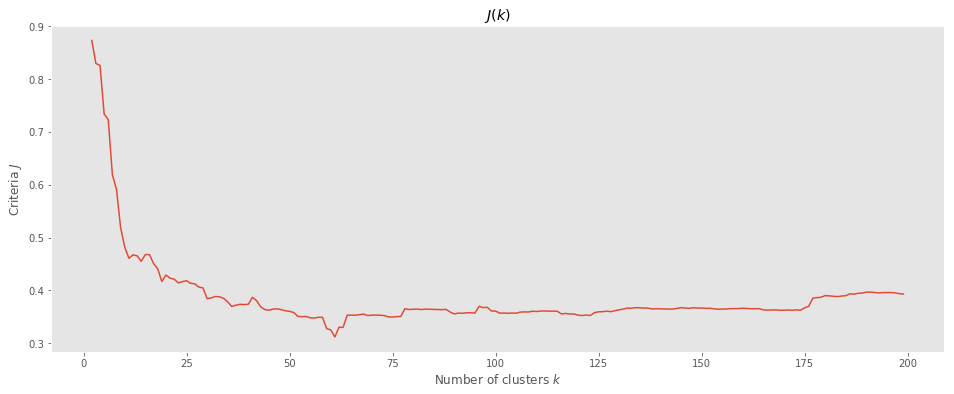

In [54]:
ks = range(2, 200)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    #cls = Clustering(n_clusters=k)
    cls = AgglomerativeClustering(n_clusters=k, linkage='average')
    y2 = cls.fit_predict(x2)
    criteria[i] = silhouette_score(x2, y2)
    #criteria[i] = quality(x_msk, y_msk)
    #print k
    
pl.figure(figsize=(16, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

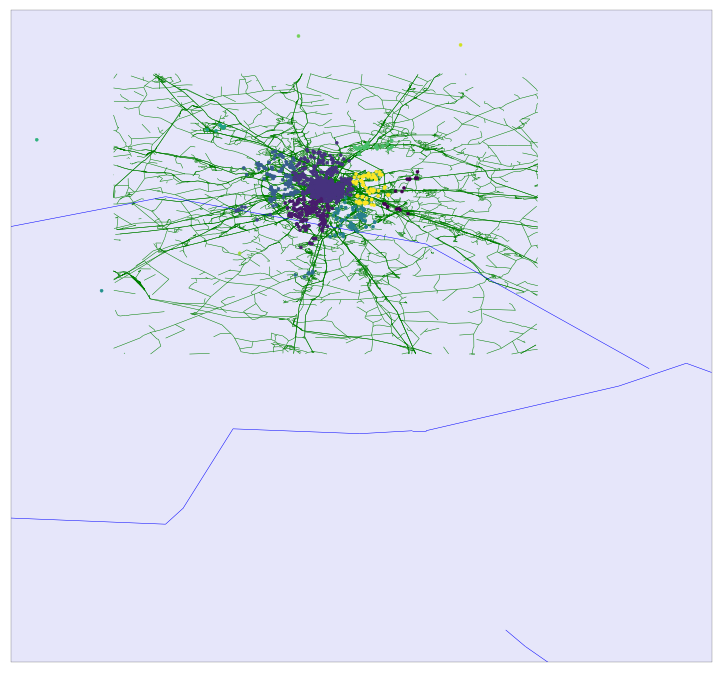

In [67]:
y2 = AgglomerativeClustering(n_clusters=15, linkage='average').fit_predict(x2)

pl.figure(figsize=(20,12))

m = bm.Basemap(projection='cyl', llcrnrlat=min(x_msk[:, 0]) - 0.1, urcrnrlat=max(x_msk[:, 0]) + 0.1, llcrnrlon=min(x_msk[:, 1]) - 0.1, urcrnrlon=max(x_msk[:, 1]) + 0.1, resolution='c')
m.readshapefile('moscow_russia.imposm-shapefiles/moscow_russia_osm_roads_gen1', 'areas', color='green')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawrivers(color='#0000ff')

m.scatter(x2[:, 1], x2[:,0], c = y2, zorder=10, marker='.')
    
pl.show()

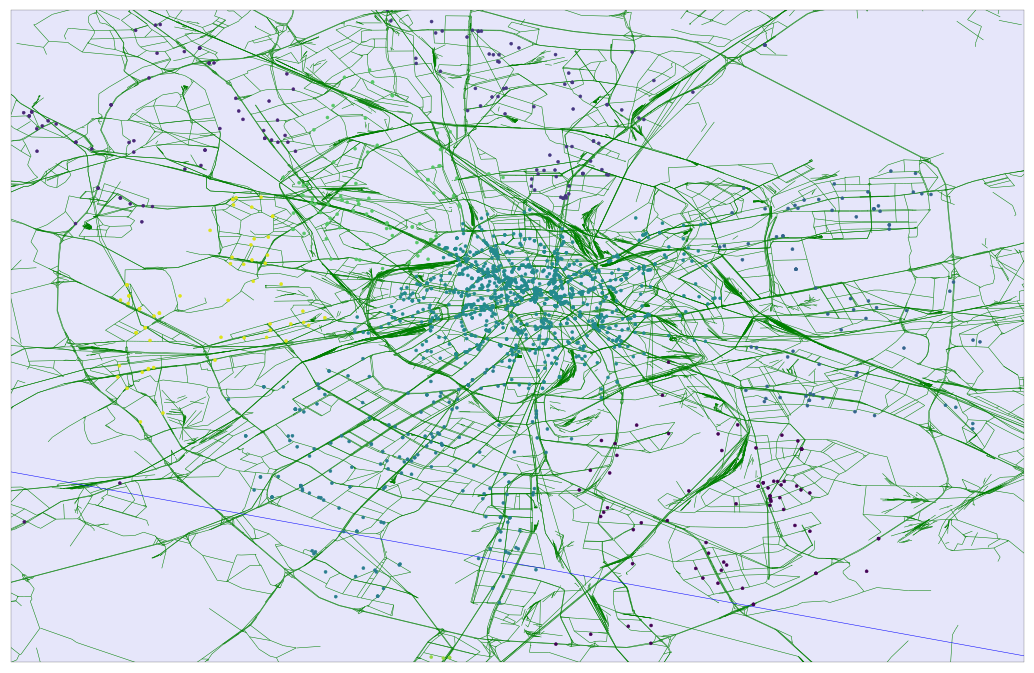

In [72]:
y3 = AgglomerativeClustering(n_clusters=20, linkage='average').fit_predict(x2)

pl.figure(figsize=(20,12))
_CENTER_LAT, _CENTER_LON = 55.750475, 37.619020
_LEFT_CORNER_LAT, _LEFT_CORNER_LON =  55.564141, 37.344362
_RIGHT_CORNER_LAT, _RIGHT_CORNER_LON = 55.908930, 37.879945
m = bm.Basemap(projection='cyl',#cass
            lat_0=_CENTER_LAT, lon_0=_CENTER_LON,
            llcrnrlon=_LEFT_CORNER_LON, llcrnrlat= _LEFT_CORNER_LAT, urcrnrlon=_RIGHT_CORNER_LON, urcrnrlat=_RIGHT_CORNER_LAT)


#m = bm.Basemap(projection='cyl', llcrnrlat=min(x_msk[:, 0]) - 0.1, urcrnrlat=max(x_msk[:, 0]) + 0.1, llcrnrlon=min(x_msk[:, 1]) - 0.1, urcrnrlon=max(x_msk[:, 1]) + 0.1, resolution='c')
m.readshapefile('moscow_russia.imposm-shapefiles/moscow_russia_osm_roads_gen1', 'areas', color='green')

m.drawcountries(linewidth=0.2)
m.fillcontinents(color='lavender', lake_color='#000040')
m.drawmapboundary(linewidth=0.2, fill_color='#000040')
m.drawparallels(np.arange(-90,90,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,0], color='white', linewidth=0.5)
m.drawrivers(color='#0000ff')

m.scatter(x2[:, 1], x2[:,0], c = y3, zorder=10, marker='.')
    
pl.show()

Какой вывод можно сделать о качестве кластеризации?

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.